# Md Khaled Mahmud Shujon


###### Goal: Weather Data Loading, Preparing, Compute, Analyze, Visualize and Save as CSV-formatted File using Pandas Module.

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language [1].

In [1]:
import pandas as pd

### Task 1: Loading and Preparing the data
        a) Read CSV file from from source.
        b) Merge both dataframes into a single dataframe.
        c) Remove rows with missing data.
        d) Remove duplicate rows.
        e) Remove'City citipy','Country code citipy' and 'City ID' columns.
        

In [2]:
# Reading the CSV files from path
northern_df = pd.read_csv('weather_northern.csv', header=0, sep=';')
southern_df = pd.read_csv('weather_southern.csv', header=0, sep=';')

# Merging the dataframes into a new datafrem
merged_df = pd.concat([northern_df, southern_df], axis=0, ignore_index=True)


# Removing rows with missing data
merged_df = merged_df.dropna()

# Removing duplicate rows
merged_df = merged_df.drop_duplicates()

# Removing columns by specifying a list of column names
columns_to_remove = ["City citipy", "Country code citipy", "City ID"]
merged_df = merged_df.drop(columns=columns_to_remove)

### Task 2: Data Correlation
        a) Compute and display a correlation matrix dataframe for weather numeric data categories using the 
           pearson method.
        b) Analyze the correlation results and find out two categories, which have the greatest negative
           correlation value.

In [3]:
# Removing Specific columns 
# Computing correlation matrix dataframe of weather numeric data using pearson method
new_merged_df = merged_df.drop(['Longitude', 'Latitude'], axis='columns')
corr_matrix = new_merged_df.corr(method='pearson', min_periods=1, numeric_only=True)

# Displaying correlation matrix dataframe
print("Correlation Matrix:")
print(corr_matrix)



Correlation Matrix:
             Temperature  Humidity      Wind    Clouds
Temperature     1.000000  0.082723  0.064944 -0.078059
Humidity        0.082723  1.000000  0.038871  0.424319
Wind            0.064944  0.038871  1.000000  0.073787
Clouds         -0.078059  0.424319  0.073787  1.000000


In the context of correlation values, a maximum negative correlation value typically indicates a strong negative relationship between the variables. It implies that as one variable increases, the other variable tends to decrease.A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time [2]. 

- Unstack dataframes, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
- Sorting dataframes, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- Head, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [4]:
"""
 the code is extracting the most negative correlation value from a correlation matrix by converting it into a Series,
 sorting the values, and then retrieving the first (most negative) value using the head(1) method.
"""
# Analyzing correlation results
max_negative_corr = corr_matrix.unstack().sort_values().head(1)
print('\nMaximum Negative Correlation:')
print(max_negative_corr)


Maximum Negative Correlation:
Temperature  Clouds   -0.078059
dtype: float64


### Task 3: Ploting Data
        Four scatter plots that visualize the relation between latitude(x-axis) and the following 
        categories(y-axis):
        1. Clouds
        2. Humidity
        3. Temperature
        4. Wind

Creating a scatter plot with marker point size and color via Pandas ploting.
- Plot dataframe, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

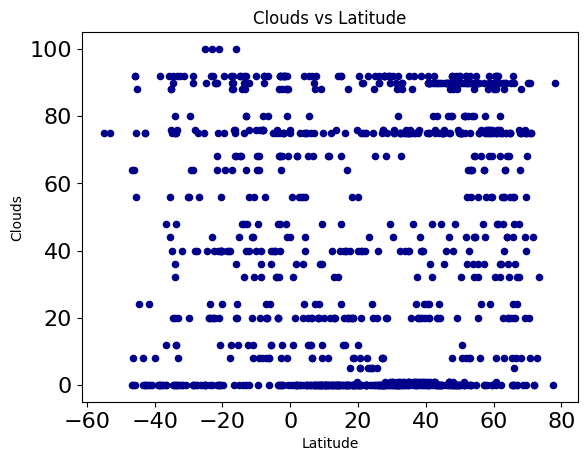

In [5]:
# Scatter plot: Clouds vs Latitude
ax1 = merged_df.plot.scatter('Latitude','Clouds', s=None,
                              title='Clouds vs Latitude',
                              c='DarkBlue',fontsize=16)

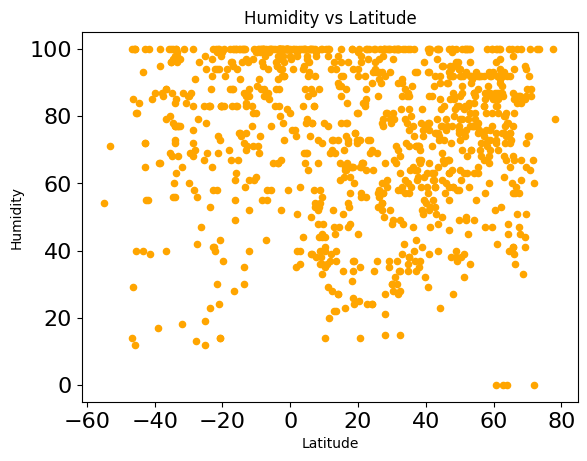

In [6]:
# Scatter plot: Humidity vs Latitude
ax2 = merged_df.plot.scatter('Latitude','Humidity', s=None,
                              title='Humidity vs Latitude',
                              c='Orange',fontsize=16)

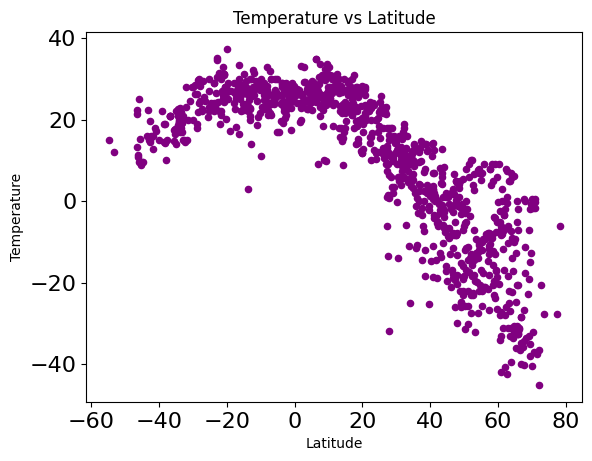

In [7]:
# Scatter plot: Temperature vs Latitude
ax3 = merged_df.plot.scatter('Latitude','Temperature', s=None, 
                              title='Temperature vs Latitude',
                              c='Purple',fontsize=16)

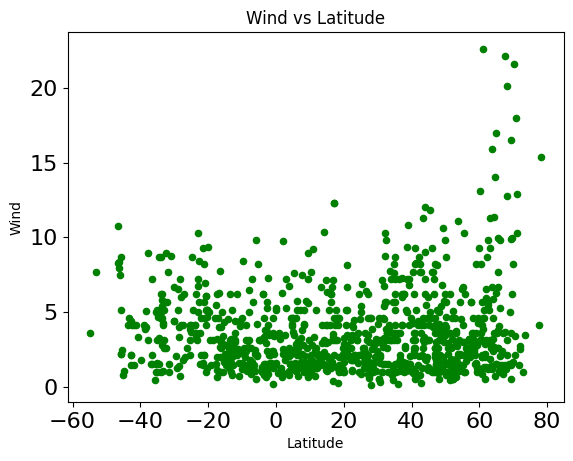

In [8]:
# Scatter plot: Wind vs Latitude
ax4 = merged_df.plot.scatter('Latitude','Wind', s=None,
                              title='Wind vs Latitude',
                              c='green',fontsize=16)

### Task 4: Sort and Save
        a) Sort data based on the latitude category.
        b) save the sorted data to a csv-formated file.

In [9]:
# Sorting data based on latitude category
sorted_df = merged_df.sort_values(by='Latitude')

Save data to a new csv file
- to_csv, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [10]:
# Saving sorted dataframe to a new CSV file
sorted_df.to_csv('Sorted_Weather_Data.csv',
                  sep=',', float_format='%.1f',
                  index=False, encoding='utf-8')

## References

[1] The pandas development team, pandas-dev/pandas: Pandas, Zenodo, 2020 (https://pandas.pydata.org/)

[2] Negative Correlation: How it Works, Examples And FAQ. Available at https://www.investopedia.com/terms/n/negative-correlation.asp Accessed on 28 May 2023.